## Uber Summer 2018 Internship Mechanical Engineering Homework
#### - Made by Travis Brashears

### This python notebook is a means to determine if a fleet of wind powered cars in Chicago is feasible.

**Challenge:**
Your boss has decided that it is feasible to field a fleet of wind powered cars in Chicago. Your
task to to prove/disprove the feasibility of this.

**Considerations:**
1. Available wind
2. Max vehicle speed with regards to wind speed and direction
   1. 1-6 passengers and baggage
3. Vehicle Weight
4. Rolling Resistance

**You should submit:**
1. Detailed description on the methods you researched
2. Description of assumptions you made and why
3. Tool you developed to calculate your results
  1. User friendly and editable
  2. Math and assumptions should be documented
  3. Excel or Python are preferred
4. Define what conditions make this feasible/infeasible

In [213]:
import numpy as np
import matplotlib.pyplot as plt

### Physics Equations

**Rolling Resistance:** $$F_r = c \cdot W = c \cdot m \cdot a_g = \frac{c_l \cdot W} {r}$$
The coefficient of rolling resistance for a slow rigid wheel on a perfectly elastic surface, not adjusted for velocity, can be calculated by: $$c = \sqrt{z/d}$$ z = sinkage, d = wheel diameter.
For cars on a road c ~ .01-.02


**Vehicle Speed:** 
$$P_{wind} = {0.5 \cdot \rho \cdot A \cdot v^3 \cdot C_p}$$
The power due to wind on a wind turbine with:

$$\rho = 1.225 kg/m^3$$
$$A = \pi \cdot (d/2)^2$$

Now converting power from turbine to power in wheels has an effiecency coefficient of mu.
$$P_{wind} \cdot \mu = P_{wheel}$$

The TRS is a common metric for measuring the Blade Tip Speed of a wind turbine to the wind speed hitting the turbine.

$$TSR = \frac{\text{Blade Tip Speed}} {\text{Wind Speed}} = \text{6 for 3 blade system}$$

We now calculate the angular velocity acting on the turbine.

$$\omega = \frac{2 \cdot v \cdot TSR} {D}$$

We then use Pressure and angular velocity to get torque to the solce for the force due to wind on the system.
$$Torque = \frac{P_{wind}} {\omega}$$
$$F_{wind} = \frac{Torque} {r}$$
$$F_{wind} = \frac{P_{wind} \cdot \mu} {\omega \cdot r}$$



### Available Wind: 
**Month/Season -> Wind Speed:** Based on data from 1991-2000 and measured at the standard height of 33 feet (10 meters). In units of MPH. 

Courtesy of http://www.isws.illinois.edu

In [123]:
January = 8.7
February = 8.6
March = 9.1
April =9.2
May =7.6
June =6.3
July =5.6
August = 5.0
September = 5.6
October = 7.0
November = 8.4
December = 7.9
Winter  = 8.4
Spring = 8.7
Summer = 5.7
Fall = 7.0
Annual = 7.4 #used in calculation
Annual_m = 3.31 #meters/second

#### Weight of Vehicle, People, and Cargo:

Typical weight of a human: 200kg

Typical weight of human cargo: 20kg

Typical weight of wind powered car: 200kg for one person and falls off as: $$sqrt{(passengers)}$$ for adding an additional passenger up to a max of 6 people.

In [182]:
# Constants
Human_weight = 200 # kg
Human_cargo = 20 #kg
Car = 200 #kg
a_g = 9.81 #m/s^2
rho_air = 1.225 #kg/m^3
d_turbine = 5 #meter
r  = (d_turbine/2) #meters
A = np.pi * (r**2) #m^2
C_d = 0.25 # coeffiecent of drag force on a wind powered car.
C_p = .5 # Coeffiecent of conversion of kinetic  energy  of  the  wind  into  mechanical  energy  turning  a  roto. Limited by Betz' Law.
TSR = 6 # for any 3 blade turbine
d_wheel = 0.3 #meters
mu = .8 # Used for converting power from turbine to power in wheels has an effiecency coefficient of mu

In [102]:
# User Iputs
Human_count = int(input("Enter number of people traveling: "))

Enter number of people traveling: 2


In [103]:
Total_mass = (Human_weight+Human_cargo)*Human_count + (Car * np.sqrt(Human_count))
Total_mass

722.84271247461902

In [209]:
def power_wind (velocity):
    #Calculated the wind power - just pass in the velocity of the wind!
    P_wind = 0.5 * rho_air * A * velocity**3 * C_p
    return P_wind
def force_accel (Total_mass, P_wind, wind_vel):
    #calculates rolling force, omega, force_wind, Net force, and accelleration. 
    Force_rolling = .01 * Total_mass * a_g # .01 comes from rolling resistance section description above.
    omega = (2 * wind_vel * TSR)/(d_turbine) # Have to calculate omega in here so it gets updated for numerical calc.
    Force_wind = (P_wind * mu)/(omega * (d_wheel/2))
    Net_force = Force_wind - Force_rolling
    accel = Net_force/Total_mass
    return(Force_rolling, Force_wind, Net_force, omega, accel)

def force_accel_a (Total_mass, P_wind, wind_vel):
    #Very similiar to above funnction, but it adds drag force for when you drive against the wind.
    Force_rolling = .01 * Total_mass * a_g
    Force_drag = 0.5 * rho_air * wind_vel**2 * C_d
    omega = (2 * wind_vel * TSR)/(d_turbine)
    Force_wind = (P_wind * mu)/(omega * (d_wheel/2))
    Net_force = Force_wind - Force_rolling - Force_drag
    accel = Net_force/Total_mass
    return(Force_rolling, Force_wind, Net_force, omega, accel)

def numerical_vel_w (v_wind, t, steps):
    #numerically calculates the velocity. This is needed because accelleration decreases as you get up to speed with the wind.
    time = np.linspace(0,t,steps)
    dt = time[1]
    velocity = 0
    P_wind =  power_wind(v_wind)
    for _ in time: 
        _, _, _, _, accel = force_accel(Total_mass, P_wind, v_wind - velocity)
        velocity += accel*dt
        P_wind = power_wind(v_wind - velocity)    
    return velocity 

def numerical_vel_a (v_wind, t, steps):
    # similiar to above but for going against the wind.
    time = np.linspace(0,t,steps)
    dt = time[1]
    velocity = 0
    P_wind =  power_wind(v_wind)
    for _ in time: 
        _, _, _, _, accel = force_accel_a(Total_mass, P_wind, v_wind + velocity)
        velocity += accel*dt 
        P_wind = power_wind(v_wind)    
    return velocity 

3.3441754496957099

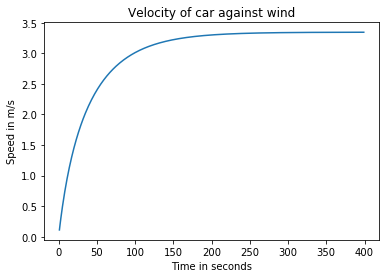

In [248]:
x = range(1,400,1)
y = []
for i in x:
    y.append(numerical_vel_a(3.4, i, 100))
plt.plot(x,y)
plt.title('Velocity of car against wind')
plt.ylabel('Speed in m/s')
plt.xlabel('Time in seconds')
plt.show()


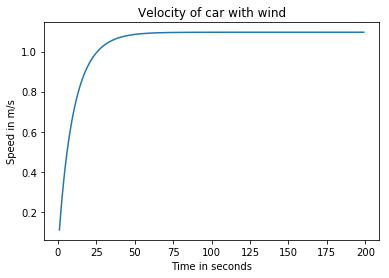

In [247]:
x = range(1,200,1)
y = []
for i in x:
    y.append(numerical_vel(3.4, i, 100))
plt.plot(x,y)
plt.title('Velocity of car with wind')
plt.ylabel('Speed in m/s')
plt.xlabel('Time in seconds')
plt.show()

### Feasability:

Based on the provided data, I don't think this is very feasible for a high speed transit option. But I do believe for low-speed cruising this could potentially be an option, if the market is there. Or for very niched areas around Chicago for signle person drives. (As getting the mass low is important)

#### Assumptions:
The case provided above is with wind speeds of 3.4m/s, 2 passengers, a turbine of 5m in diameter, and wheels of .3m in diamter. These are the most important factors to change/adjust/analyze. The above example merely offers one example of what is possible.

It also follows from the above that you only travel with or agianst the wind, traveling in other directions will fall between these two regimes. I also didnt assume any lofting affects that happen with a turbine in a stream. Some wind powered cars can get going really fast if they travel against the wind because of the following:

$$ \cfrac {V} {V_\infty} = \cfrac {1} {a} -1$$

They are able to get a, the axial induction very close to zero.

### *References:*
*Wind Powered Car Analysis: http://orbit.dtu.dk/fedora/objects/orbit:55484/datastreams/file_3748519/content*

*Wind Turbine Motion: https://www.raeng.org.uk/publications/other/23-wind-turbine*

*Wind Power Car Blades: http://ia-e.org/siteadmin/upload/3341IAE0315209.pdf*

*Wind Speed: http://web.mit.edu/windenergy/windweek/Presentations/Wind%20Energy%20101.pdf*

*Forces on Sails: https://en.wikipedia.org/wiki/Forces_on_sails*

*Down wind propeller vehicle: http://www.ijsrp.org/research-paper-0413/ijsrp-p16135.pdf*

*Wind powered car wiki: https://en.wikipedia.org/wiki/Wind-powered_vehicle*